In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np


In [ ]:
road_acc=pd.read_csv("/content/road_accident_dataset.csv")
road_acc

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,...,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,...,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,...,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,...,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,...,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131995,Germany,2023,June,Wednesday,Evening,Rural,Main Road,Foggy,351.740871,4,...,0,37.405598,1907.208566,Icy,Speeding,3,18640.125887,50695.311876,Asia,173.307333
131996,Brazil,2023,January,Tuesday,Morning,Rural,Main Road,Foggy,95.563567,1,...,4,17.054490,2706.253339,Dry,Drunk Driving,2,48161.129965,20260.167191,Asia,4375.443810
131997,Russia,2021,March,Wednesday,Afternoon,Urban,Street,Clear,74.112102,3,...,3,55.558876,6860.161645,Dry,Speeding,9,24696.058692,8132.133502,Asia,4196.244517
131998,Australia,2002,May,Tuesday,Morning,Urban,Street,Rainy,276.612565,3,...,2,19.100498,1523.299088,Wet,Speeding,8,13486.716680,17607.573072,Europe,2911.904030


In [ ]:
road_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      132000 non-null  object 
 1   Year                         132000 non-null  int64  
 2   Month                        132000 non-null  object 
 3   Day of Week                  132000 non-null  object 
 4   Time of Day                  132000 non-null  object 
 5   Urban/Rural                  132000 non-null  object 
 6   Road Type                    132000 non-null  object 
 7   Weather Conditions           132000 non-null  object 
 8   Visibility Level             132000 non-null  float64
 9   Number of Vehicles Involved  132000 non-null  int64  
 10  Speed Limit                  132000 non-null  int64  
 11  Driver Age Group             132000 non-null  object 
 12  Driver Gender                132000 non-null  object 
 13 

In [ ]:
road_acc.isnull().sum()

,0
Country,0
Year,0
Month,0
Day of Week,0
Time of Day,0
Urban/Rural,0
Road Type,0
Weather Conditions,0
Visibility Level,0
Number of Vehicles Involved,0


In [ ]:
road_acc.dropna(axis=0,inplace=True)

# What is the distribution of accidents by Year?

In [ ]:
grouped_data = road_acc.groupby(['Accident Cause', 'Year']).size().reset_index()
grouped_data=pd.DataFrame(grouped_data)
grouped_data.columns=['Accident Cause','Year','Count']

print(grouped_data.head(10))

       Accident Cause  Year  Count
0  Distracted Driving  2000    587
1  Distracted Driving  2001    550
2  Distracted Driving  2002    566
3  Distracted Driving  2003    582
4  Distracted Driving  2004    547
5  Distracted Driving  2005    567
6  Distracted Driving  2006    526
7  Distracted Driving  2007    598
8  Distracted Driving  2008    548
9  Distracted Driving  2009    539


In [ ]:
px.bar(grouped_data,x='Accident Cause',y='Count',color='Year',hover_data=['Year'],title="Accident Cause by Year").show()


# Which Country has the highest number of accidents?

In [ ]:
grouped_data2 = road_acc['Country'].value_counts().reset_index()
grouped_data2=pd.DataFrame(grouped_data2)
grouped_data2



,Country,count
0,Australia,7050
1,Germany,7048
2,Canada,6988
3,China,6958
4,UK,6931
5,India,6929
6,USA,6913
7,Brazil,6901
8,Japan,6770
9,Russia,6721


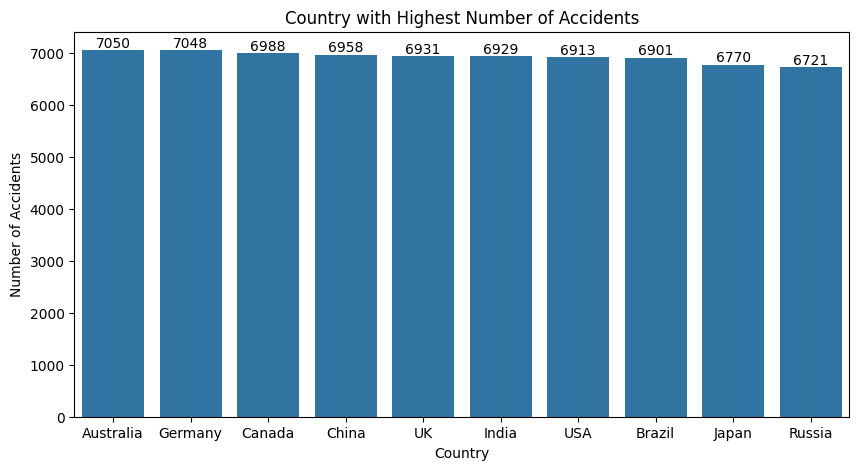

In [ ]:
plt.figure(figsize=(10,5))
fig=sns.barplot(x='Country',y='count',data=grouped_data2)
for container in fig.containers:
    fig.bar_label(container)
plt.title("Country with Highest Number of Accidents")
plt.xlabel("Country")
plt.ylabel("Number of Accidents")
plt.show()

# What are the most common Accident Causes?

In [ ]:
group_data3=road_acc['Accident Cause'].value_counts().reset_index()
group_data3=pd.DataFrame(group_data3)
group_data3

,Accident Cause,count
0,Drunk Driving,13894
1,Distracted Driving,13877
2,Mechanical Failure,13847
3,Speeding,13811
4,Weather,13779


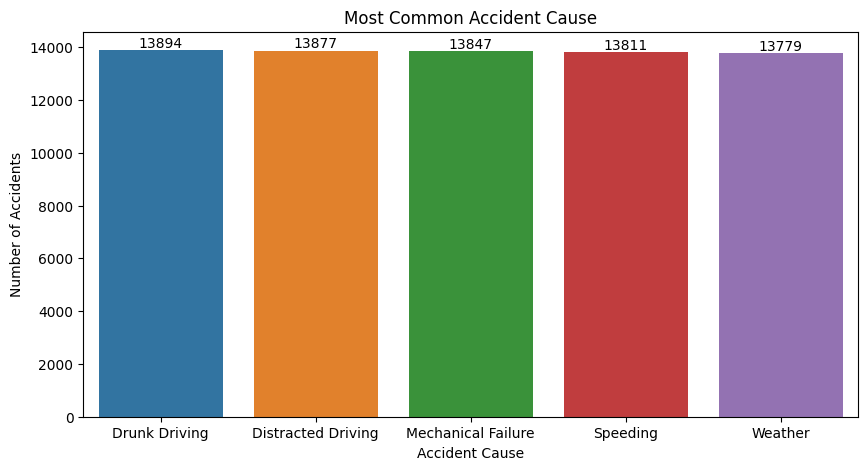

In [ ]:
plt.figure(figsize=(10,5))
fig=sns.barplot(x='Accident Cause',y='count',data=group_data3,hue="Accident Cause")
for container in fig.containers:
    fig.bar_label(container)
plt.title("Most Common Accident Cause")
plt.xlabel("Accident Cause")
plt.ylabel("Number of Accidents")
plt.show()

# What is the distribution of Accident Severity (e.g., minor, major)?

In [ ]:
group_data4=road_acc['Accident Severity'].value_counts().reset_index()
group_data4=pd.DataFrame(group_data3)
group_data4

,Accident Severity,count
0,Minor,23110
1,Severe,23096
2,Moderate,23002


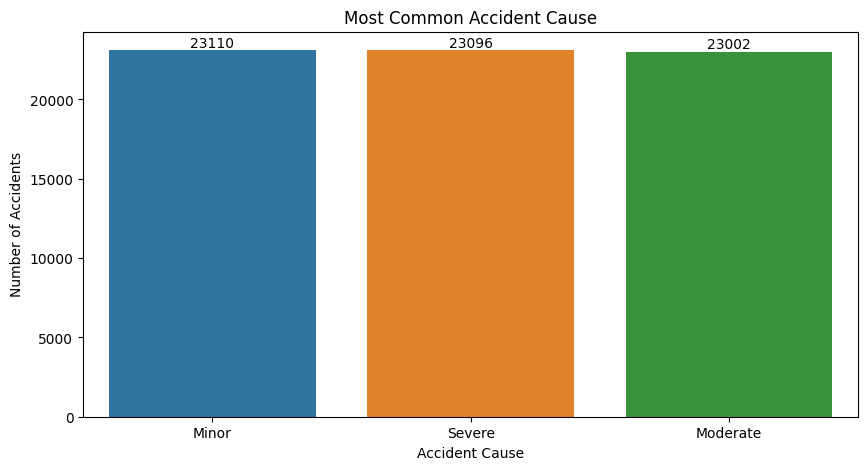

In [ ]:
plt.figure(figsize=(10,5))
fig=sns.barplot(x='Accident Severity',y='count',data=group_data4,hue="Accident Severity")
for container in fig.containers:
    fig.bar_label(container)
plt.title("Most Common Accident Cause")
plt.xlabel("Accident Cause")
plt.ylabel("Number of Accidents")
plt.show()

# What are the most frequent Weather Conditions during accidents?

In [ ]:
group_data5=road_acc['Weather Conditions'].value_counts().reset_index()
group_data5=pd.DataFrame(group_data5)
group_data5

,Weather Conditions,count
0,Windy,13998
1,Clear,13841
2,Rainy,13823
3,Foggy,13780
4,Snowy,13767


# How does Accident Severity vary across different Road Types?

In [ ]:
group_data6=road_acc.groupby(['Accident Severity','Road Type']).size().reset_index()
group_data6=pd.DataFrame(group_data6)
group_data6.columns=['Accident Severity','Road Type','Count']
group_data6

,Accident Severity,Road Type,Count
0,Minor,Highway,7592
1,Minor,Main Road,7936
2,Minor,Street,7582
3,Moderate,Highway,7595
4,Moderate,Main Road,7690
5,Moderate,Street,7717
6,Severe,Highway,7811
7,Severe,Main Road,7704
8,Severe,Street,7581


In [ ]:
px.treemap(group_data6,path=['Accident Severity','Road Type'],values='Count',title="Accident Severity by Road Type").show()

# How does the Time of Day influence the Number of Fatalities?

In [ ]:
fatalities_by_time = road_acc.groupby('Time of Day')['Number of Fatalities'].sum()
print(fatalities_by_time)

Time of Day
Afternoon    34411.0
Evening      34447.0
Morning      34115.0
Night        35262.0
Name: Number of Fatalities, dtype: float64


In [ ]:
fig1=px.pie(fatalities_by_time,names=fatalities_by_time.index,values=fatalities_by_time.values,title="Fatalities by Time of Day")

fig1.update_traces(textposition='inside', textinfo='percent+label')

fig1.show()


# Which Regions experience the highest Economic Loss due to accidents?

In [ ]:
economic_loss_by_region = road_acc.groupby('Region')['Economic Loss'].sum()
print(economic_loss_by_region)

Region
Asia             7.000161e+08
Australia        7.020319e+08
Europe           7.010180e+08
North America    6.953168e+08
South America    6.977649e+08
Name: Economic Loss, dtype: float64


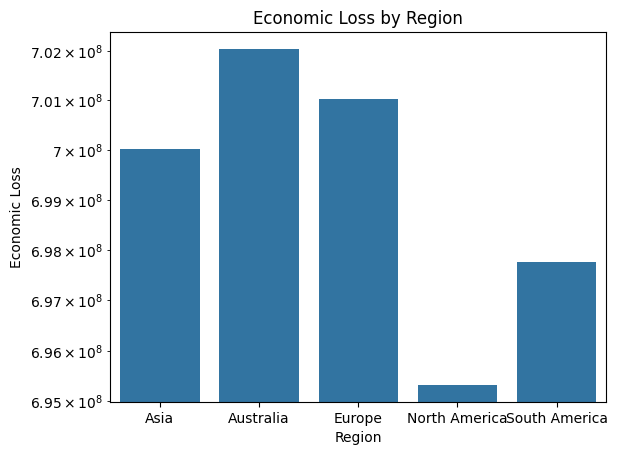

In [ ]:
sns.barplot(x=economic_loss_by_region.index, y=economic_loss_by_region.values)
plt.title('Economic Loss by Region')
plt.xlabel('Region')
plt.ylabel('Economic Loss')
plt.yscale("log")
plt.show()

# How do Weather Conditions, Road Condition, and Accident Severity interact?


In [ ]:
weather_road_severity = road_acc.groupby(['Weather Conditions', 'Road Condition', 'Accident Severity']).size().unstack().head(10).reset_index()
print(weather_road_severity)

Accident Severity Weather Conditions Road Condition  Minor  Moderate  Severe
0                              Clear            Dry   1144      1147    1159
1                              Clear            Icy   1155      1156    1123
2                              Clear   Snow-covered   1173      1195    1157
3                              Clear            Wet   1144      1154    1134
4                              Foggy            Dry   1143      1107    1114
5                              Foggy            Icy   1132      1105    1179
6                              Foggy   Snow-covered   1115      1160    1144
7                              Foggy            Wet   1174      1208    1198
8                              Rainy            Dry   1102      1103    1128
9                              Rainy            Icy   1193      1063    1180


<function matplotlib.pyplot.show(close=None, block=None)>

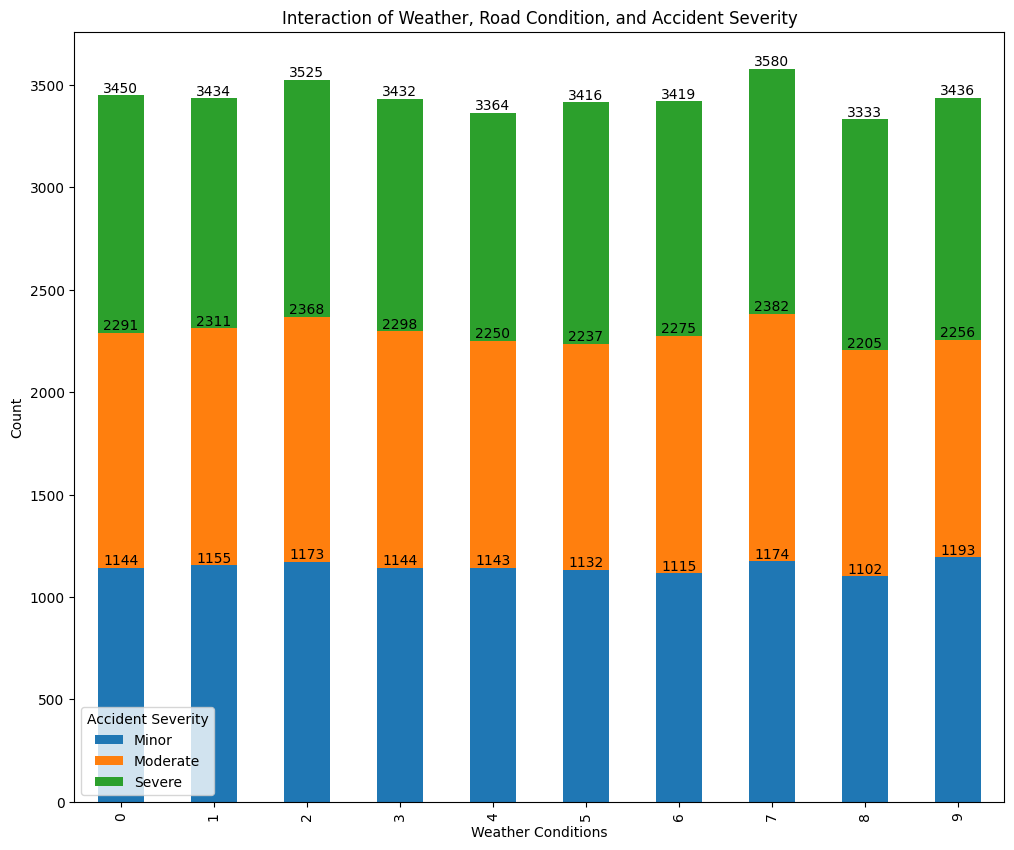

In [ ]:
fig3=weather_road_severity.plot(kind='bar', stacked=True, figsize=(12, 10), title='Interaction of Weather, Road Condition, and Accident Severity')
for container in fig3.containers:
    fig3.bar_label(container)
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show

# Which Driver Age Group and Driver Gender combination is most involved in accidents?

In [ ]:
driver_age_gender_counts = road_acc.groupby(['Driver Age Group','Driver Gender']).size().unstack()
print(driver_age_gender_counts)

Driver Gender     Female  Male
Driver Age Group              
18-25               6826  6969
26-40               6858  7053
41-60               6986  6844
61+                 6853  6885
<18                 6986  6949


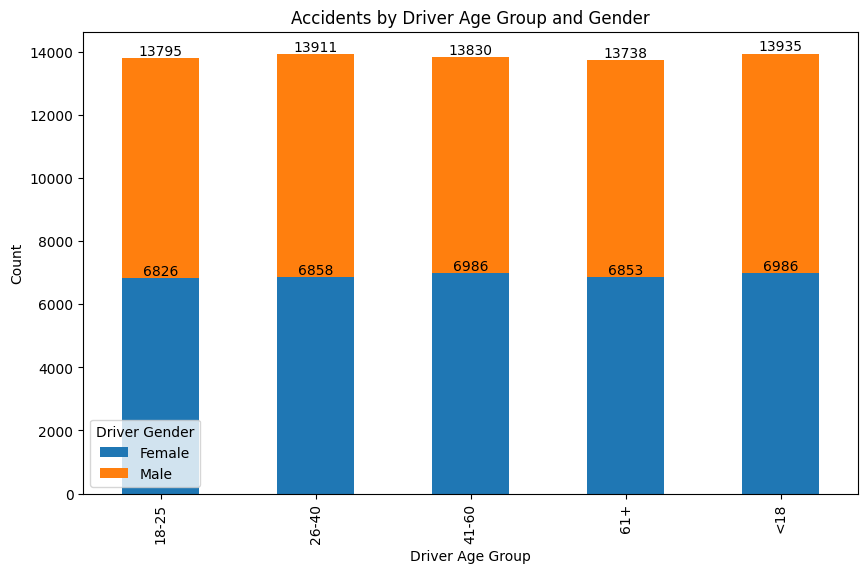

In [ ]:
fig4=driver_age_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6), title='Accidents by Driver Age Group and Gender')
for container in fig4.containers:
    fig4.bar_label(container)
plt.xlabel('Driver Age Group')
plt.ylabel('Count')
plt.legend(title='Driver Gender')
plt.show()

# What is the correlation between Population Density, Traffic Volume, and Number of Fatalities?

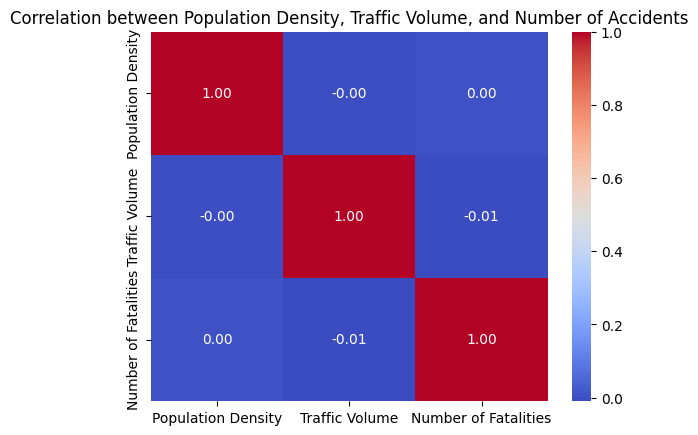

In [ ]:
correlation_data = road_acc[['Population Density', 'Traffic Volume', 'Number of Fatalities']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Population Density, Traffic Volume, and Number of Accidents')
plt.show()

# Can we identify patterns in Emergency Response Time based on accident severity and region?

Region             Asia  Australia  Europe  North America  South America
Accident Severity                                                       
Minor              32.4       32.6    32.5           32.3           32.8
Moderate           32.5       32.9    32.4           32.4           32.3
Severe             32.4       32.4    32.4           32.8           32.2


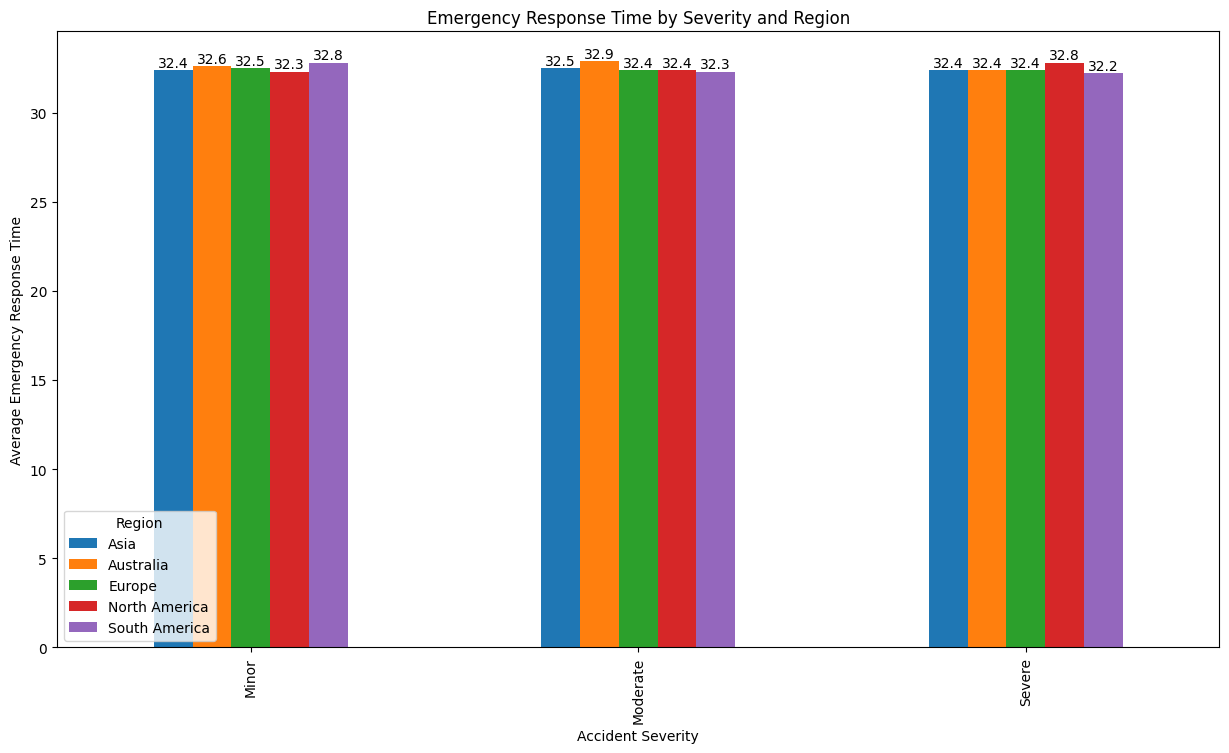

In [ ]:
response_time_patterns = road_acc.groupby(['Accident Severity', 'Region'])['Emergency Response Time'].mean().unstack().round(1)
print(response_time_patterns)

fig5=response_time_patterns.plot(kind='bar', figsize=(15, 8), title='Emergency Response Time by Severity and Region')
for container in fig5.containers:
    fig5.bar_label(container)
plt.xlabel('Accident Severity')
plt.ylabel('Average Emergency Response Time')
plt.legend(title='Region')
plt.show()



In [ ]:
road_acc.to_csv("road_acc_eda2.csv",index=False)